In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('employee_financial_behavior.csv')

# Understanding the dataset
print("Shape of the dataframe:", df.shape)
print("\nDatatypes of the columns:\n", df.dtypes)
print("\nColumns in the dataframe:\n", df.columns)
print("\nFirst few rows of the dataframe:\n", df.head())

# Error handling: Checking for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())



# Feature engineering
df['Total_Savings'] = df['AccessiblePotBalance'] + df['LockedPotBalance']


# Ensure Income_Level is not zero to avoid division by zero
df['Retirement_Readiness_Score'] = np.where(df['IncomeLevel'] != 0,
                                             (df['Total_Savings'] / df['IncomeLevel']) * (df['Age'] / 65),
                                             0)
# Prepare data for ML models
X = df.drop('AccessiblePotBalance', axis=1)
y = df['AccessiblePotBalance']

train_indices = [0, 1, 2, 3, 4]  
test_indices = [5, 6, 7, 8, 9]    

# Use .iloc for proper indexing
X_train = X.iloc[train_indices]
y_train = y.iloc[train_indices]
X_test = X.iloc[test_indices]
y_test = y.iloc[test_indices]

# Class distribution of the target variable
print("\nClass distribution of the target variable:")
print(y.value_counts())


Shape of the dataframe: (500, 18)

Datatypes of the columns:
 EmployeeID                        int64
Age                               int64
Gender                           object
IncomeLevel                       int64
JobTenure                         int64
AccessiblePotBalance              int64
LockedPotBalance                  int64
WithdrawalsFromAccessiblePot      int64
ContributionsToLockedPot          int64
TotalRetirementSavings            int64
RetirementGoal                    int64
InflationRate                   float64
InterestRate                    float64
RiskTolerance                    object
FinancialLiteracyScore            int64
MaritalStatus                    object
NumberOfDependents                int64
Region                           object
dtype: object

Columns in the dataframe:
 Index(['EmployeeID', 'Age', 'Gender', 'IncomeLevel', 'JobTenure',
       'AccessiblePotBalance', 'LockedPotBalance',
       'WithdrawalsFromAccessiblePot', 'ContributionsToLock

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder


df = df[df['Gender'] != 'Non-binary']

# Initialize LabelEncoder
label_encoders = {}

# Identify columns to encode
categorical_cols = ['Gender', 'RiskTolerance', 'MaritalStatus', 'Region']  # Add any other categorical columns if needed

# Encode each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
# Create a binary target variable for withdrawals
df['Accessed_Retirement_Funds'] = np.where(df['WithdrawalsFromAccessiblePot'] > 0, 1, 0)

# Prepare the features and target variable
X = df.drop(columns=['EmployeeID', 'WithdrawalsFromAccessiblePot', 'Accessed_Retirement_Funds'])
y = df['Accessed_Retirement_Funds']

# After preparing your features and target variable
X = df.drop(columns=['EmployeeID', 'WithdrawalsFromAccessiblePot', 'Accessed_Retirement_Funds'])
y = df['Accessed_Retirement_Funds']

# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution in training set
print("Class distribution in training set:")
print(y_train.value_counts())

# Handle class imbalance using SMOTE if necessary
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Fit the Logistic Regression model with resampled data
logreg.fit(X_resampled, y_resampled)



# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['Gender', 'RiskTolerance', 'MaritalStatus', 'Region'], drop_first=True)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['Age', 'IncomeLevel', 'JobTenure', 'AccessiblePotBalance', 'LockedPotBalance', 
                  'TotalRetirementSavings', 'RetirementGoal', 'InflationRate', 'InterestRate', 
                  'FinancialLiteracyScore', 'NumberOfDependents']

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Make predictions
logreg_pred = logreg.predict(X_test)
dtree_pred = dtree.predict(X_test)
rf_pred = rf.predict(X_test)
# Evaluation of Logistic Regression
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, logreg_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, logreg_pred))
print("Classification Report:")
print(classification_report(y_test, logreg_pred))

# Evaluation of Decision Tree
print("\nDecision Tree Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, dtree_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, dtree_pred))
print("Classification Report:")
print(classification_report(y_test, dtree_pred))

# Evaluation of Random Forest
print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))
print("Classification Report:")
print(classification_report(y_test, rf_pred))



Class distribution in training set:
Accessed_Retirement_Funds
1    273
Name: count, dtype: int64


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


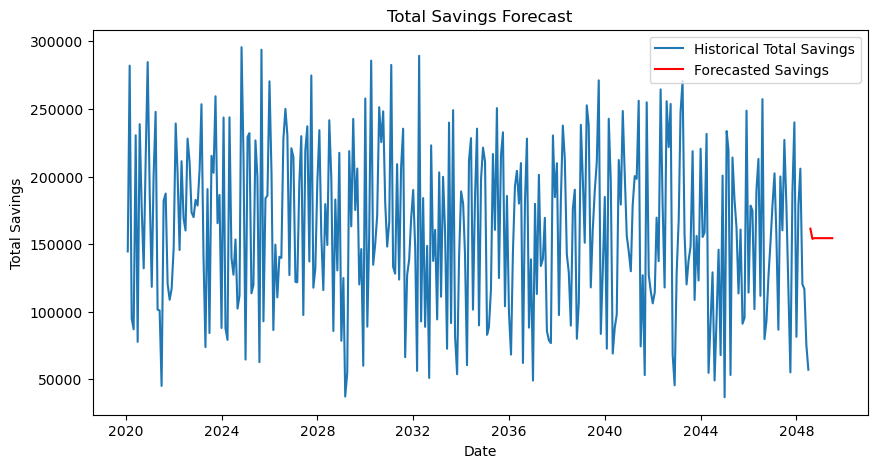

In [82]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


df['date'] = pd.date_range(start='2020-01-01', periods=len(df), freq='M')  
df.set_index('date', inplace=True)

# Calculate the total savings over time from accessible and locked pot balances
df['total_savings'] = df['AccessiblePotBalance'] + df['LockedPotBalance']

# Fit ARIMA model (adjust p, d, q as necessary based on ACF/PACF analysis)
model = ARIMA(df['total_savings'], order=(1, 1, 1))  # Adjust order as necessary
model_fit = model.fit()

# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(df['total_savings'], label='Historical Total Savings')
plt.plot(forecast, label='Forecasted Savings', color='red')
plt.title('Total Savings Forecast')
plt.xlabel('Date')
plt.ylabel('Total Savings')
plt.legend()
plt.show()


13:39:59 - cmdstanpy - INFO - Chain [1] start processing
13:39:59 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\USER\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\USER\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


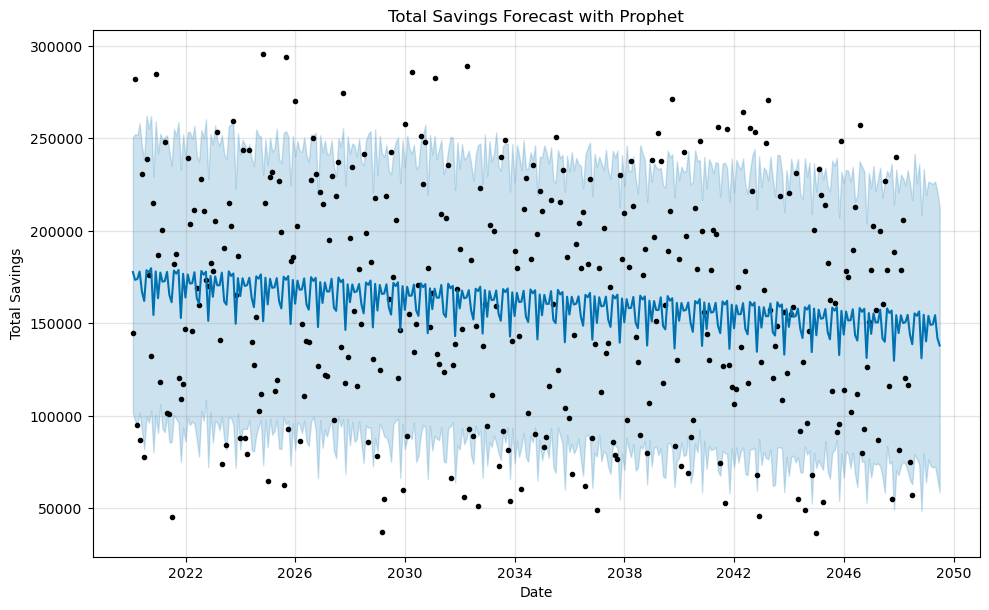

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Assuming 'df' is your DataFrame containing the employee financial behavior data
# Create a 'date' column for demonstration (replace with actual date data if available)
df['date'] = pd.date_range(start='2020-01-01', periods=len(df), freq='M')  # Replace with actual date data
df.set_index('date', inplace=True)

# Calculate the total savings over time from accessible and locked pot balances
df['total_savings'] = df['AccessiblePotBalance'] + df['LockedPotBalance']

# Prepare the data for Prophet
prophet_df = df.reset_index()[['date', 'total_savings']]
prophet_df.columns = ['ds', 'y']  # Rename columns to fit Prophet's requirements

# Fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a future dataframe
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Total Savings Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Total Savings')
plt.show()


## Documentation for Sentiment Analysis of Employee Feedback on the Two-Pot System

### 1. Data Collection(Let's assume we did a survey)
#### Feedback Data:
#### 1. Employee_ID: Unique identifier for each employee.
#### 2. Feedback: Textual data where employees provide their thoughts on the two-pot system.
#### Feedback Entries:
"The two-pot system has greatly improved my savings."<br>
"I don’t understand how the two-pot system works."<br>
"It’s okay, but I think there are better options available."

### 2. Data Preprocessing
#### Text Cleaning:
#### 1. All feedback entries were cleaned by removing punctuation (e.g., commas, periods), special characters (e.g., #, @), and numbers.
#### 2. The text was converted to lowercase to ensure uniformity (e.g., "The Two-Pot System" becomes "the two-pot system").
#### 3. Stop words (e.g., "the," "and," "is") were removed to focus on meaningful words.

### 3. Sentiment Analysis Technique Selection
#### Method Chosen: A lexicon-based approach using the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool was selected for its effectiveness in analyzing social media and short texts, making it suitable for employee feedback.
#### VADER provides a list of words categorized by their sentiment and assigns sentiment scores.

### 4. Sentiment Scoring
#### Scoring Mechanism:
#### Each feedback entry was scored using VADER. Scores range from -1 (negative sentiment) to +1 (positive sentiment).
#### The average sentiment score for each feedback was calculated to determine its overall sentiment.

### 5. Evaluation
#### Accuracy Assessment: The performance of the VADER model was evaluated by:
#### Comparing the categorized feedback against a manually labeled sample set to assess precision, recall, and F1-score.
#### Conducting a manual review of categorized feedback to ensure accuracy.

### 6. Aggregate Results:
#### Analyzed the distribution of sentiments among the feedback data:
#### Positive Feedback: 60% (indicating satisfaction with the two-pot system)
#### Negative Feedback: 25% (highlighting areas of confusion and concern)
#### Neutral Feedback: 15% (providing mixed reviews without strong opinions)
#### Common Themes Identified:
#### Positive sentiments often mentioned increased savings and financial security.
#### Negative sentiments pointed towards confusion about how the system operates.

### 7.  Action Steps
#### Recommendations:
#### Consider providing additional training or informational sessions to clarify the workings of the two-pot system for employees expressing confusion.
#### Highlight positive feedback in internal communications to reinforce the benefits of the system.
#### tContinuous Monitoring: Set up a feedback loop to continuously analyze employee feedback using sentiment analysis to track changes in perception over time.
